In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

/home/irfan/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os, shutil

In [3]:
def move_file(img_path, data):
    for row in data[1:]:
        file_property = row.split(',')
        file_source = img_path + file_property[0]
        
        if len(file_property) > 1:
            class_path = img_path + file_property[3]
            folder_exist = os.path.isdir(class_path)
            if not folder_exist:
                os.makedirs(class_path)
            try:
                # print(file_source)
                shutil.copy(file_source, class_path +"/",)
            except:
                theres_error = True
            finally:
                pass

train_path = './images/train/'
test_path = './images/test/'

f = open('train_labels.csv', 'r')
data = f.read().split('\n')
f.close()
move_file('./images/train/', data)
f = open('test_labels.csv', 'r')
data = f.read().split('\n')
f.close()
move_file('./images/test/', data)


In [4]:
import torch
from PIL import Image
from pathlib import Path
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random

In [5]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

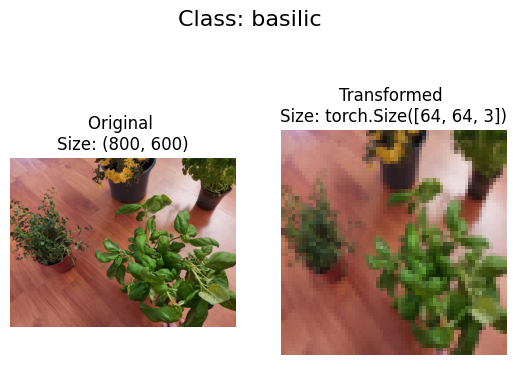

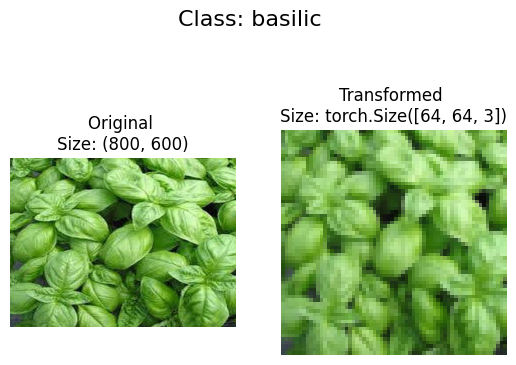

In [6]:
# Setup path to data folder

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.split('/')[3]}", fontsize=16)

plot_transformed_images(['./images/train/basilic/20201120_165211.jpg',
                            './images/train/basilic/344.jpg'], 
                        transform=data_transform, 
                        n=2)

In [7]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_path, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_path, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 133
    Root location: ./images/train/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 25
    Root location: ./images/test/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [8]:
class_names = train_data.classes
class_names

['basilic',
 'basilique',
 'chrysantheme jaune',
 'chrysanthemes jaunes',
 'persil',
 'thym',
 'thyma',
 'xx']

In [9]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'basilic': 0,
 'basilique': 1,
 'chrysantheme jaune': 2,
 'chrysanthemes jaunes': 3,
 'persil': 4,
 'thym': 5,
 'thyma': 6,
 'xx': 7}

In [10]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'basilic': 0,
 'basilique': 1,
 'chrysantheme jaune': 2,
 'chrysanthemes jaunes': 3,
 'persil': 4,
 'thym': 5,
 'thyma': 6,
 'xx': 7}

In [11]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.9059, 0.8980, 0.8863,  ..., 0.9804, 0.9804, 0.9804],
         [0.9020, 0.8941, 0.8863,  ..., 0.9804, 0.9804, 0.9804],
         [0.8980, 0.8902, 0.8510,  ..., 0.9804, 0.9804, 0.9804],
         ...,
         [0.4745, 0.4824, 0.4902,  ..., 0.9294, 0.9294, 0.9294],
         [0.4745, 0.4824, 0.4902,  ..., 0.9059, 0.9059, 0.9059],
         [0.4745, 0.4824, 0.4902,  ..., 0.9294, 0.8902, 0.8745]],

        [[0.9098, 0.9137, 0.9020,  ..., 0.9804, 0.9804, 0.9804],
         [0.9176, 0.9098, 0.9020,  ..., 0.9804, 0.9804, 0.9804],
         [0.9216, 0.9098, 0.8824,  ..., 0.9804, 0.9804, 0.9804],
         ...,
         [0.4118, 0.4196, 0.4275,  ..., 0.9294, 0.9333, 0.9333],
         [0.4118, 0.4196, 0.4275,  ..., 0.9059, 0.9059, 0.9098],
         [0.4118, 0.4196, 0.4275,  ..., 0.9294, 0.8941, 0.8784]],

        [[0.9333, 0.8549, 0.8471,  ..., 0.9804, 0.9804, 0.9804],
         [0.8902, 0.8706, 0.8667,  ..., 0.9804, 0.9804, 0.9804],
         [0.8627, 0.8863, 0.8078,  ..., 0.98

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


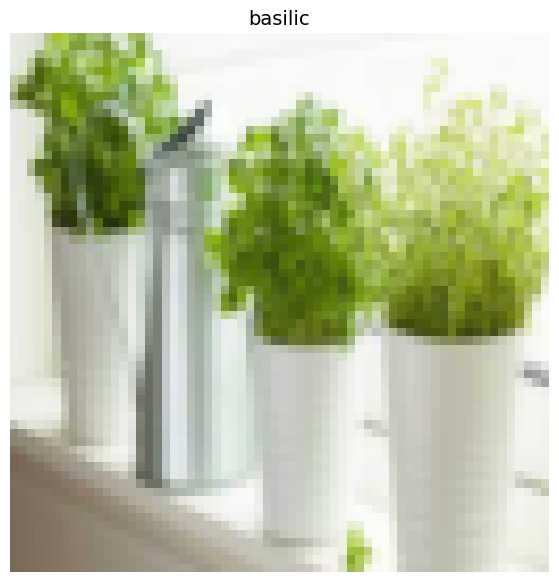

In [12]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [13]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=4, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=4, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f49c9c07970>,
 <torch.utils.data.dataloader.DataLoader at 0x7f49c9c07220>)

In [14]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([4, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([4])


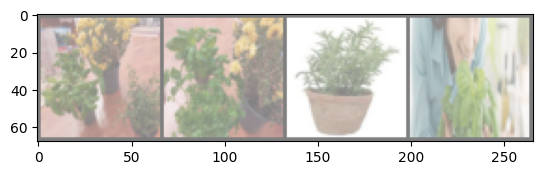

chrysantheme jaune persil thym  basilic


In [15]:

import torch
from torch import nn
# functions to show an image
batch_size = 4
classes = class_names

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [16]:
# Create simple transform
simple_transform = transforms.Compose([ 
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [17]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_path, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_path, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 8 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7f49df586d30>,
 <torch.utils.data.dataloader.DataLoader at 0x7f49c9c01580>)

In [18]:
# Setup device-agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"

In [19]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=8, bias=True)
  )
)

In [20]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0482,  0.0554,  0.0311, -0.0297, -0.0241,  0.0500, -0.0653,  0.0627]])

Output prediction probabilities:
tensor([[0.1290, 0.1299, 0.1268, 0.1193, 0.1200, 0.1292, 0.1151, 0.1308]])

Output prediction label:
tensor([7])

Actual label:
0


In [21]:
print("hello")

hello


In [22]:
# # Install torchinfo if it's not available, import it if it is
# try: 
#     import torchinfo
# except:
#     !pip install torchinfo
# import torchinfo
    
# from torchinfo import summary
# summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size 

In [24]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [25]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [26]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [27]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

 20%|██        | 1/5 [00:01<00:06,  1.67s/it]

Epoch: 1 | train_loss: 1.9308 | train_acc: 0.1625 | test_loss: 2.1802 | test_acc: 0.0000


 40%|████      | 2/5 [00:02<00:03,  1.10s/it]

Epoch: 2 | train_loss: 1.8190 | train_acc: 0.2963 | test_loss: 2.6991 | test_acc: 0.0000


 60%|██████    | 3/5 [00:03<00:01,  1.09it/s]

Epoch: 3 | train_loss: 1.6800 | train_acc: 0.2963 | test_loss: 2.5611 | test_acc: 0.0000


 80%|████████  | 4/5 [00:03<00:00,  1.19it/s]

Epoch: 4 | train_loss: 1.5952 | train_acc: 0.3300 | test_loss: 2.3428 | test_acc: 0.0000


100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

Epoch: 5 | train_loss: 1.6157 | train_acc: 0.2625 | test_loss: 2.3373 | test_acc: 0.0000
Total training time: 4.516 seconds


In [28]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

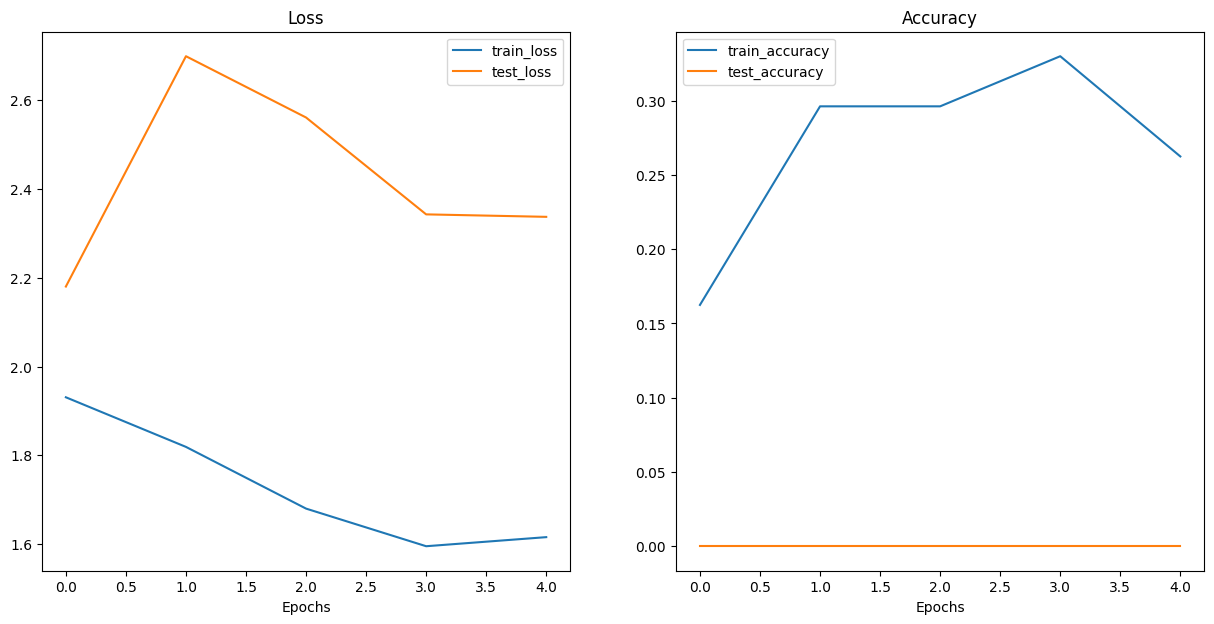

In [30]:

def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
plot_loss_curves(model_0_results)

In [31]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [33]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_path, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_path, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 133
     Root location: ./images/train/
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 25
     Root location: ./images/test/
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ))

In [34]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f4a7f8e6880>,
 <torch.utils.data.dataloader.DataLoader at 0x7f49c9c07220>)

In [35]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=8, bias=True)
  )
)

In [36]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

 20%|██        | 1/5 [00:00<00:02,  1.36it/s]

Epoch: 1 | train_loss: 1.9486 | train_acc: 0.1062 | test_loss: 2.2781 | test_acc: 0.0000


 40%|████      | 2/5 [00:01<00:02,  1.30it/s]

Epoch: 2 | train_loss: 1.6293 | train_acc: 0.3300 | test_loss: 2.9204 | test_acc: 0.0000


 60%|██████    | 3/5 [00:02<00:01,  1.37it/s]

Epoch: 3 | train_loss: 1.7271 | train_acc: 0.2963 | test_loss: 2.8456 | test_acc: 0.0000


 80%|████████  | 4/5 [00:02<00:00,  1.41it/s]

Epoch: 4 | train_loss: 1.6070 | train_acc: 0.2963 | test_loss: 2.4748 | test_acc: 0.0000


100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

Epoch: 5 | train_loss: 1.6142 | train_acc: 0.3112 | test_loss: 2.4504 | test_acc: 0.2800
Total training time: 3.598 seconds


In [37]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.930776,0.16250,2.180246,0.0
1,1.819006,0.29625,2.699118,0.0
2,1.679989,0.29625,2.561072,0.0
3,1.595248,0.33000,2.342836,0.0
4,1.615694,0.26250,2.337301,0.0


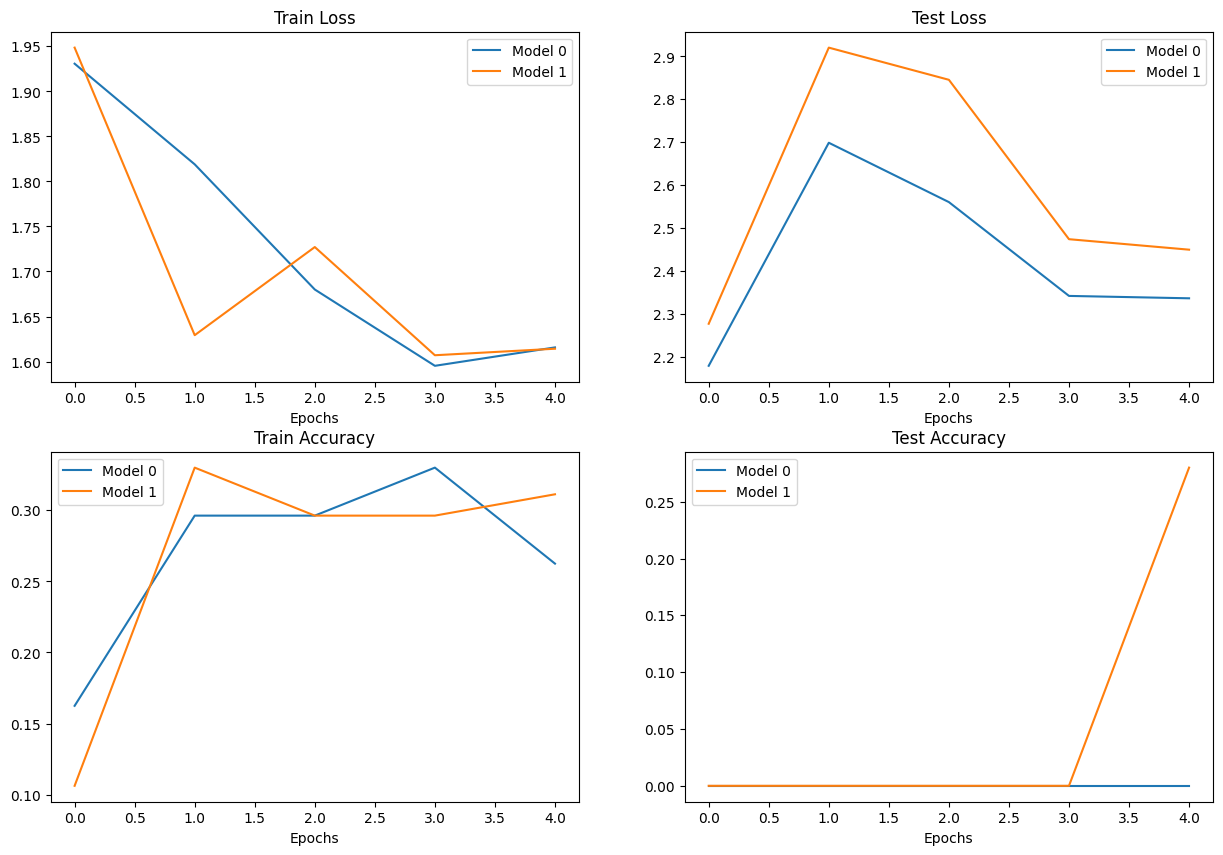

In [38]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [39]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = "./images/test/basilic/20201120_165101.jpg"

# # Download the image if it doesn't already exist
# if not custom_image_path.is_file():
#     with open(custom_image_path, "wb") as f:
#         # When downloading from GitHub, need to use the "raw" file link
#         request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
#         print(f"Downloading {custom_image_path}...")
#         f.write(request.content)
# else:
#     print(f"{custom_image_path} already exists, skipping download.")

In [40]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[136, 139, 142,  ..., 202, 202, 203],
         [136, 138, 140,  ..., 201, 201, 202],
         [135, 136, 135,  ..., 200, 200, 200],
         ...,
         [138, 139, 137,  ..., 168, 174, 182],
         [138, 139, 137,  ..., 162, 167, 170],
         [138, 139, 137,  ..., 159, 171, 175]],

        [[ 61,  64,  67,  ..., 132, 132, 133],
         [ 61,  63,  65,  ..., 131, 131, 132],
         [ 61,  62,  61,  ..., 130, 130, 130],
         ...,
         [ 68,  69,  67,  ..., 121, 133, 146],
         [ 68,  69,  67,  ..., 113, 125, 132],
         [ 68,  69,  67,  ..., 110, 129, 137]],

        [[ 58,  61,  64,  ..., 122, 122, 123],
         [ 58,  60,  62,  ..., 121, 121, 122],
         [ 58,  59,  58,  ..., 120, 120, 120],
         ...,
         [ 68,  69,  67,  ..., 103, 111, 122],
         [ 68,  69,  67,  ...,  96, 103, 109],
         [ 68,  69,  67,  ...,  93, 107, 114]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 600, 800])

Custom image dtype

In [41]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.5333, 0.5451, 0.5569,  ..., 0.7922, 0.7922, 0.7961],
         [0.5333, 0.5412, 0.5490,  ..., 0.7882, 0.7882, 0.7922],
         [0.5294, 0.5333, 0.5294,  ..., 0.7843, 0.7843, 0.7843],
         ...,
         [0.5412, 0.5451, 0.5373,  ..., 0.6588, 0.6824, 0.7137],
         [0.5412, 0.5451, 0.5373,  ..., 0.6353, 0.6549, 0.6667],
         [0.5412, 0.5451, 0.5373,  ..., 0.6235, 0.6706, 0.6863]],

        [[0.2392, 0.2510, 0.2627,  ..., 0.5176, 0.5176, 0.5216],
         [0.2392, 0.2471, 0.2549,  ..., 0.5137, 0.5137, 0.5176],
         [0.2392, 0.2431, 0.2392,  ..., 0.5098, 0.5098, 0.5098],
         ...,
         [0.2667, 0.2706, 0.2627,  ..., 0.4745, 0.5216, 0.5725],
         [0.2667, 0.2706, 0.2627,  ..., 0.4431, 0.4902, 0.5176],
         [0.2667, 0.2706, 0.2627,  ..., 0.4314, 0.5059, 0.5373]],

        [[0.2275, 0.2392, 0.2510,  ..., 0.4784, 0.4784, 0.4824],
         [0.2275, 0.2353, 0.2431,  ..., 0.4745, 0.4745, 0.4784],
         [0.2275, 0.2314, 0.2275,  ..

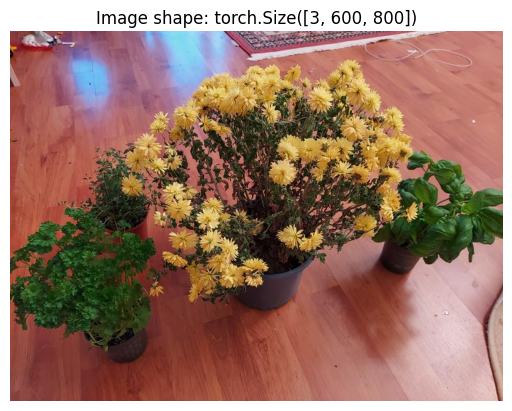

In [42]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [43]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 600, 800])
New shape: torch.Size([3, 64, 64])


In [44]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [45]:
custom_image_pred

tensor([[ 1.1836, -2.2680,  0.1004,  0.6648,  1.1189,  1.0032, -2.3331, -2.2275]])

In [46]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 1.1836, -2.2680,  0.1004,  0.6648,  1.1189,  1.0032, -2.3331, -2.2275]])
Prediction probabilities: tensor([[0.2631, 0.0083, 0.0891, 0.1566, 0.2466, 0.2197, 0.0078, 0.0087]])
Prediction label: tensor([0])


In [47]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'basilic'